In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import scipy.linalg as la
import nb_general as nb
import sage

In [2]:
# Create example
petersen = nx.general_random_intersection_graph(6,6,[.5 for _ in range(6)])

/opt/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


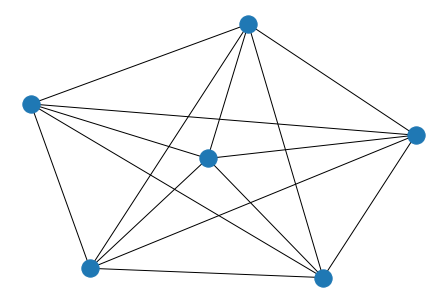

In [3]:
nx.draw(petersen,pos=nx.spring_layout(petersen))
plt.show()

In [4]:
# Get A and B
A = nx.adjacency_matrix(petersen).todense()
nb_petersen,B = nb.to_edge_space(petersen,B=True,graph=False)
B_inb = la.inv(B)

In [8]:
def reconstruct_B(B):
    new_b = np.zeros_like(B)
    for i in range(B.shape[0]):
        indices = B[i,:].nonzero()[0]
        if indices[1] - indices[0] == 2:
            new_b[indices[1]-1,:] = B[i,:]
        else:
            new_b[-(i+1),:] = B[i,:]
    return new_b
                

In [9]:
D = np.diag(list(dict(petersen.degree()).values()))
D_e = np.diag(nb_petersen.sum(axis=1))

In [7]:
new_b

NameError: name 'new_b' is not defined

In [27]:
vals

array([ 3.69254381e+00+0.j        ,  1.11022302e-16+1.73205081j,
        1.11022302e-16-1.73205081j, -8.46271906e-01+1.59173366j,
       -8.46271906e-01-1.59173366j, -5.00000000e-01+1.93649167j,
       -5.00000000e-01-1.93649167j, -5.00000000e-01+1.93649167j,
       -5.00000000e-01-1.93649167j, -5.00000000e-01+1.93649167j,
       -5.00000000e-01-1.93649167j, -1.00000000e+00+0.j        ,
       -1.00000000e+00+0.j        , -1.00000000e+00+0.j        ,
        1.00000000e+00+0.j        ,  1.00000000e+00+0.j        ,
        1.00000000e+00+0.j        ,  1.00000000e+00+0.j        ,
        1.00000000e+00+0.j        , -1.00000000e+00+0.j        ,
       -1.00000000e+00+0.j        , -1.00000000e+00+0.j        ,
        1.00000000e+00+0.j        ,  1.00000000e+00+0.j        ,
        1.00000000e+00+0.j        , -1.00000000e+00+0.j        ,
       -1.00000000e+00+0.j        ,  1.00000000e+00+0.j        ])

In [36]:
(D-np.eye(D.shape[0]))@la.inv(B)

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 28 is different from 6)

In [38]:
np.trace(la.inv(B))

0.0

# Small example

In [41]:
G = nx.Graph([[1,2],[2,3],[3,4],[2,4],[1,4]])
A = nx.adjacency_matrix(G).todense()
D = np.diag(list(dict(G.degree()).values()))
I = np.eye(D.shape[0])
C, B = nb.to_edge_space(G,B=True,graph=False)

In [47]:
B

array([[0., 0., 0., 1., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 1.],
       [0., 0., 1., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [49]:
2*la.inv(B)

array([[ 0.,  0.,  0.,  0., -0.,  0., -0.,  0.,  0.,  2.],
       [ 0.,  0.,  2.,  0., -0.,  0., -0.,  0.,  0.,  0.],
       [-1.,  0.,  0.,  0., -0.,  1., -0.,  0.,  1.,  0.],
       [ 1.,  0.,  0.,  0., -0., -1., -0.,  0.,  1.,  0.],
       [ 1.,  0.,  0.,  0., -0.,  1., -0.,  0., -1.,  0.],
       [ 0.,  0.,  0.,  0., -0.,  0., -0.,  2.,  0.,  0.],
       [ 0.,  0.,  0.,  2., -0.,  0., -0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  1.,  0., -1.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0., -1.,  0.,  1.,  0.,  0.,  0.],
       [ 0., -1.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  0.]])

In [50]:
S, T = nb.create_s_t(G)

In [60]:
la.inv(S@T)

LinAlgError: singular matrix

In [58]:
la.inv(B)

array([[ 0. ,  0. ,  0. ,  0. , -0. ,  0. , -0. ,  0. ,  0. ,  1. ],
       [ 0. ,  0. ,  1. ,  0. , -0. ,  0. , -0. ,  0. ,  0. ,  0. ],
       [-0.5,  0. ,  0. ,  0. , -0. ,  0.5, -0. ,  0. ,  0.5,  0. ],
       [ 0.5,  0. ,  0. ,  0. , -0. , -0.5, -0. ,  0. ,  0.5,  0. ],
       [ 0.5,  0. ,  0. ,  0. , -0. ,  0.5, -0. ,  0. , -0.5,  0. ],
       [ 0. ,  0. ,  0. ,  0. , -0. ,  0. , -0. ,  1. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. ,  1. , -0. ,  0. , -0. ,  0. ,  0. ,  0. ],
       [ 0. ,  0.5,  0. ,  0. ,  0.5,  0. , -0.5,  0. ,  0. ,  0. ],
       [ 0. ,  0.5,  0. ,  0. , -0.5,  0. ,  0.5,  0. ,  0. ,  0. ],
       [ 0. , -0.5,  0. ,  0. ,  0.5,  0. ,  0.5,  0. ,  0. ,  0. ]])

In [66]:
# Regular example
G = nx.complete_graph(4)
C, B = nb.to_edge_space(G,graph=False, B= True)
la.eig(2*la.inv(B)+B)
la.eig(nx.adjacency_matrix(G).todense())

(array([-1.+0.j,  3.+0.j, -1.+0.j, -1.+0.j]),
 array([[-0.8660254 ,  0.5       , -0.41381232, -0.15075567],
        [ 0.28867513,  0.5       ,  0.85519107,  0.05025189],
        [ 0.28867513,  0.5       , -0.22068937, -0.64605873],
        [ 0.28867513,  0.5       , -0.22068937,  0.74656251]]))

In [62]:
B

array([[0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1.],
       [1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0.],
       [1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0.]])

In [30]:
# 3-prism graph
G = nx.Graph([[1,2],[2,3],[3,1],[1,4],[2,5],[3,6],[4,5],[5,6],[4,6]])
C, B = nb.to_edge_space(G,graph=False, B=True)

In [26]:
new_B = B
new_B[0,:] = B[3,:]
new_B[3,:] = B[0,:]
new_B[1,:] = B[7,:]
new_B[7,:] = B[1,:]
new_B[2,:] = B[9,:]
new_B[9,:] = B[2,:]

In [27]:
new_B

array([[0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.],
       [1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.],
       [1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.],
       [0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0.,
        0., 0.],
       [0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.],
       [1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        1., 1.],
       [1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0.,
        0., 0.],
       [0., 0., 0., 0

In [28]:
B

array([[0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.],
       [1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.],
       [1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.],
       [0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0.,
        0., 0.],
       [0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.],
       [1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        1., 1.],
       [1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0.,
        0., 0.],
       [0., 0., 0., 0

In [31]:
la.inv(B)

array([[ 0. ,  0. ,  0. , -0.5,  0. ,  0. ,  0. ,  0.5, -0. ,  0.5,  0. ,
         0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. ,  0.5,  0. ,  0. ,  0. , -0.5, -0. ,  0.5,  0. ,
         0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. ,  0.5,  0. ,  0. ,  0. ,  0.5, -0. , -0.5,  0. ,
         0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [-0.5,  0. ,  0. ,  0. ,  0. ,  0. ,  0.5,  0. , -0. ,  0. ,  0. ,
         0. ,  0.5,  0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0.5,  0. ,  0. ,  0. ,  0. ,  0. , -0.5,  0. , -0. ,  0. ,  0. ,
         0. ,  0.5,  0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0.5,  0. ,  0. ,  0. ,  0. ,  0. ,  0.5,  0. , -0. ,  0. ,  0. ,
         0. , -0.5,  0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0. ,  0.5,  0. ,  0. , -0.5,  0. ,  0. ,  0. , -0. ,  0. ,  0. ,
         0. ,  0. ,  0. ,  0. ,  0.5,  0. ,  0. ],
       [ 0. , -0.5,  0. ,  0. ,  0.5,  0. ,  0. ,  0. , -0. ,  0. ,  0. ,
         0. ,  0. ,  0. ,  0. ,  0.5,  0. ,  0. ],
